## Final Project Submission

Please fill out:
* Student name: 
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


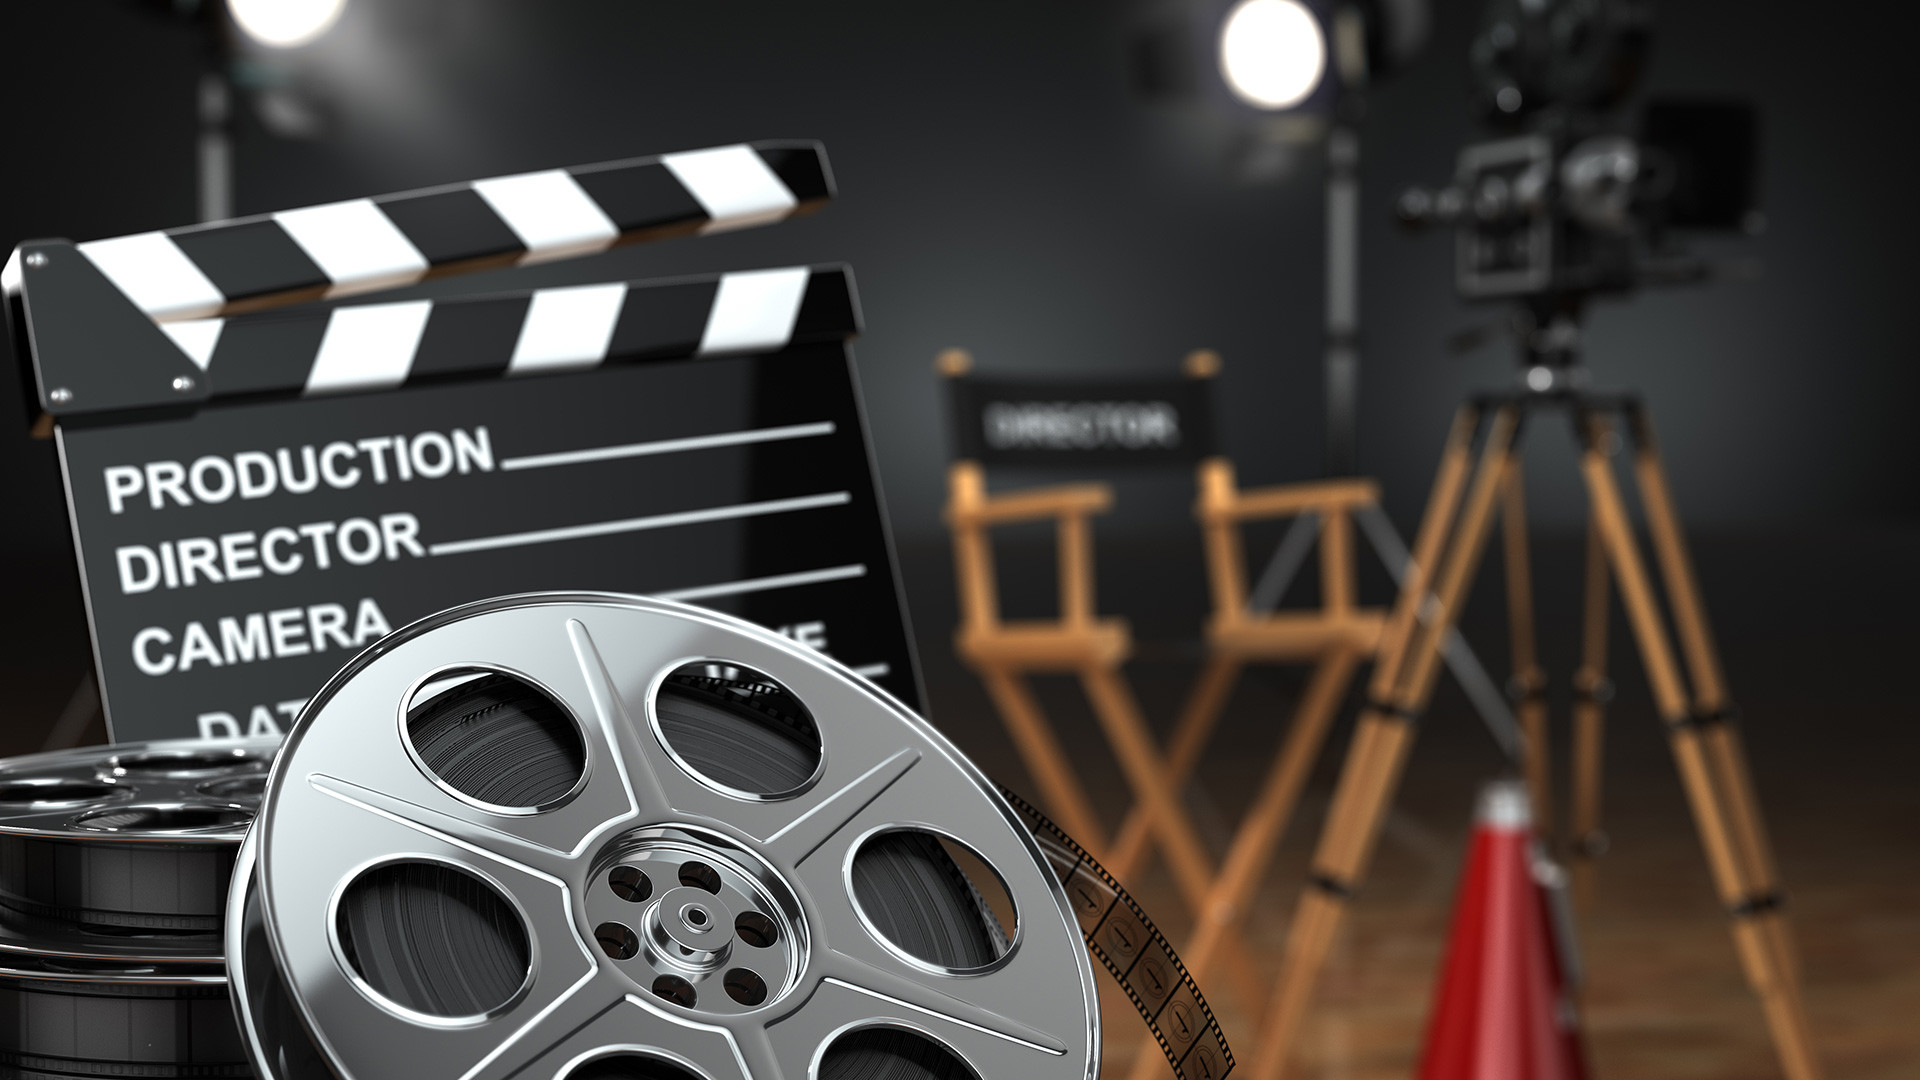

# Overview

This project analyzes data from IMDb, which is an online database containing information related to movies and other films. Exploratory data analysis including univvariate and multivariate analysis shows that success of a movie depends on the genre, length of the movie and the ratings it has received. The Microsoft studio can use these insights to decide what to allocate resources to and also the kind of movies that would be profitable for them.  


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have explored the nature of the movies that are currently showing best performance at the box office. I then displayed how length of film, genre and customer feedback translates to good performance of a movie.

# Data Understanding

I will use data from from two files from IMDb.
1. The first dataset contains information on title basics: 'title.basics.csv', referenced as df dataframe.
2. The second dataset contains information on title ratings: 'title.ratings.csv', referenced as df2 dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. First Dataset 

In [2]:
#Load the dataset
df=pd.read_csv('title.basics.csv')
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# Let us find out the dimensions of our dataframe
df.shape

(146144, 6)

The dataframe has 146144 rows and 6 columns

In [4]:
#What columns are present in the dataset?
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [5]:
#find out the type of information contained in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Having obtained the summary of the content of the dataset we will explore different columns to further understand our data


<AxesSubplot:title={'center':'Start year Distribution'}, ylabel='Frequency'>

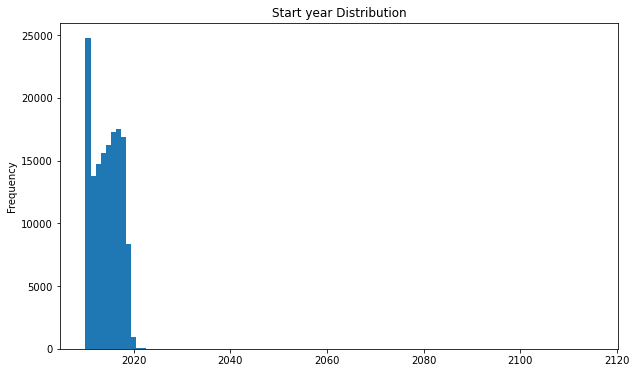

In [6]:
df['start_year'].plot.hist(bins = 100, title = 'Start year Distribution', figsize= (10,6))

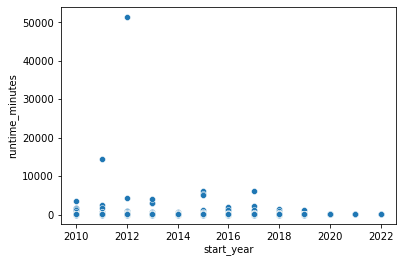

In [7]:
sns.scatterplot(x= df['start_year'], y= df['runtime_minutes']);

In [8]:
df['genres']= df['genres'].str.split(",")

df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [9]:
df= df.explode('genres')
print(type(df['genres']))
df

<class 'pandas.core.series.Series'>


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


<AxesSubplot:title={'center':'Percentage distribution of all the movie genres in the dataset'}, ylabel='genres'>

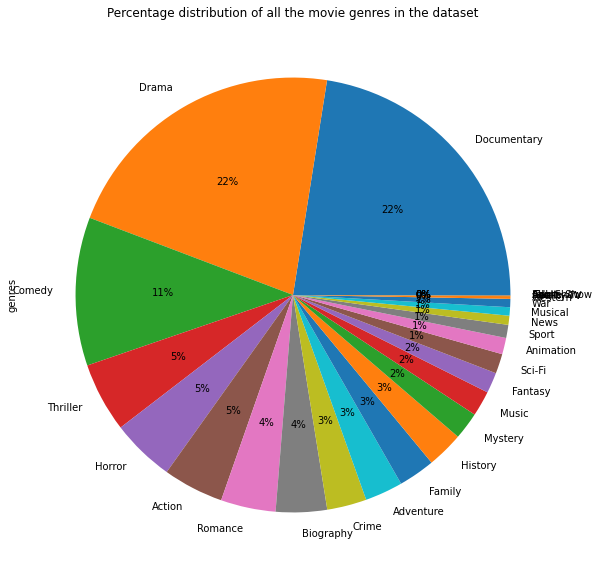

In [10]:
df.genres.value_counts().plot.pie(figsize= (10,10), autopct= "%.0f%%",
                                  title = 'Percentage distribution of all the movie genres in the dataset',
                                 rot= 90, sort_columns=True)
                                                 

<AxesSubplot:xlabel='runtime_minutes'>

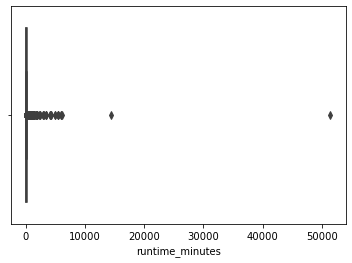

In [11]:
#Checking for outliers in the column
sns.boxplot(x= df['runtime_minutes'])

The column presents outliers that need to be handled as we look at the business case. We will cap the values instead of dropping the outliers altogether because dropping a significant amount of values will affect our analysis. We will consider values that are within 98% of all the records.

In [12]:
# Define the threshold to get the quantiles ie. lower limit and the upper limit.
Q1= df['runtime_minutes'].quantile(0.02)
Q3= df['runtime_minutes'].quantile(0.98)

In [13]:
df.loc[:,'runtime_minutes_capped'] = np.where(df.loc[:,'runtime_minutes'] > Q3, Q3,
                                        np.where(df.loc[:,'runtime_minutes']< Q1, Q1, 
                                                 df.loc[:,'runtime_minutes']))
df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,149.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,114.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,114.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,123.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,116.0


<AxesSubplot:xlabel='runtime_minutes_capped'>

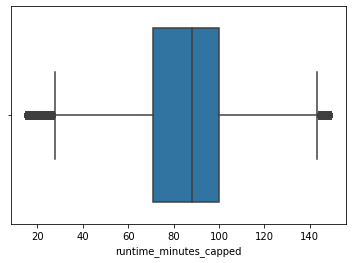

In [14]:
#Redraw the boxplot to check whether outliers have been dealt with.
sns.boxplot(x= df['runtime_minutes_capped'])

We have handled our outliers by capping the values of the running time. 
We will use the new column, runningtime_minutes_capped to continue our analysis. 

## Checking for Duplicates

In [15]:
#Check whether our data contains duplicate records and the total number
df.duplicated().value_counts()

False    234958
dtype: int64

In [16]:
#Display the dataframe of duplicated records
df[df.duplicated(keep=False)].sort_values(by= 'tconst')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped


Our data does not contain any duplicates.

## Checking for missing values

In [17]:
# Find the null values in each column. Sum the resulting boolean values
#Divide by the length of each column to find the percentage missing values
df.isna().sum()/len(df)

tconst                    0.000000
primary_title             0.000000
original_title            0.000089
start_year                0.000000
runtime_minutes           0.166217
genres                    0.023017
runtime_minutes_capped    0.166217
dtype: float64

Knowing the percentage of missing values in each column helps us know how to handle the missing values in each column.


 ## a) original_title
Missing %value (0.000089)
The percentage is small therefore we will drop the missing rows without interfering with the analysis. 

In [18]:
#Drop rows where original_title column values are null
df= df.dropna(subset=['original_title'], how='all')
df.isna().sum()

tconst                        0
primary_title                 0
original_title                0
start_year                    0
runtime_minutes           39037
genres                     5389
runtime_minutes_capped    39037
dtype: int64

## b) runtime_minutes_capped

The missing %value is 0.166217. This is a significant percentage therefore we will explore the data some more in order to decide how to handle the missing values.

In [19]:
#Viewing basic statistical details
df['runtime_minutes_capped'].describe()

count    195900.000000
mean         85.272231
std          26.779096
min          15.000000
25%          71.000000
50%          88.000000
75%         100.000000
max         149.000000
Name: runtime_minutes_capped, dtype: float64

<AxesSubplot:title={'center':'Distribution of The Movie Runtime'}, ylabel='Frequency'>

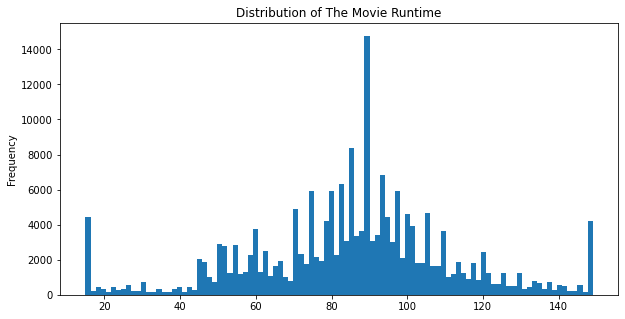

In [20]:
df['runtime_minutes_capped'].plot.hist(bins = 100, title = 'Distribution of The Movie Runtime', figsize= (10,5))

We will replace them with the median because it is least affected by extreme values. From our statistical assessment, the new data now has a normal distribution

In [21]:
df.loc[:,'runtime_minutes_capped'] =  df.loc[:,'runtime_minutes_capped'].fillna(df.loc[:,'runtime_minutes_capped'].median())
df.isna().sum()

C:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


tconst                        0
primary_title                 0
original_title                0
start_year                    0
runtime_minutes           39037
genres                     5389
runtime_minutes_capped        0
dtype: int64

## c) genres 
We have different ways of dealing with this categorical column. Given that the data may be useful we wil not drop the null values. We can fill the missing values with a static value hence treating it as a separate valid category

In [22]:
df.loc[:,'genres']= df.loc[:,'genres'].fillna('No genre')
df.isna().sum()

tconst                        0
primary_title                 0
original_title                0
start_year                    0
runtime_minutes           39037
genres                        0
runtime_minutes_capped        0
dtype: int64

In [23]:
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,149.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,114.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,114.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,123.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,88.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,88.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,No genre,116.0


## 2. Second Dataset

In [24]:
#Load the dataset
df2=pd.read_csv('title.ratings.csv')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
# Let us find out the dimensions of our dataframe
df2.shape

(73856, 3)

The dataframe has 73856 rows and 3 columns namely: tconst, averagerating and numvotes

In [26]:
#find out the type of information contained in this dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The summary shows that no columns are empty. The datatypes for each column are also appropriate for the data they hold.

In [27]:
#Generating some descriptive statistics in order to futher understand our data
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


<AxesSubplot:title={'center':'UnitPrice vs UnitDiscount'}, xlabel='averagerating', ylabel='numvotes'>

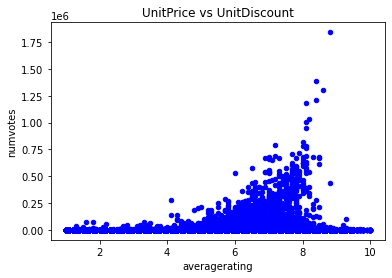

In [28]:
#Checking how our two numerical columns are related
df2.plot.scatter(x = 'averagerating', y = 'numvotes', color = 'blue', title = 'UnitPrice vs UnitDiscount')

## Checking for Duplicates

In [29]:
#Check whether our data contains duplicate records and the total number of the duplicates if present
df2.duplicated().value_counts()

False    73856
dtype: int64

In [30]:
#Display the dataframe of duplicated records
df2[df2.duplicated(keep=False)].sort_values(by= 'tconst')

,tconst,averagerating,numvotes


## Handling outliers

<AxesSubplot:>

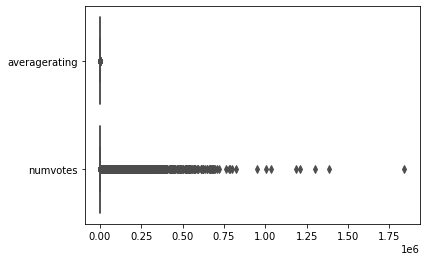

In [31]:
#Checking for outliers in the columns
sns.boxplot(data= df2, color= 'gray', orient= 'h')

The column numvotes has outliers from the boxplot observation. 

<AxesSubplot:title={'center':'The Distribution of votes'}, ylabel='Frequency'>

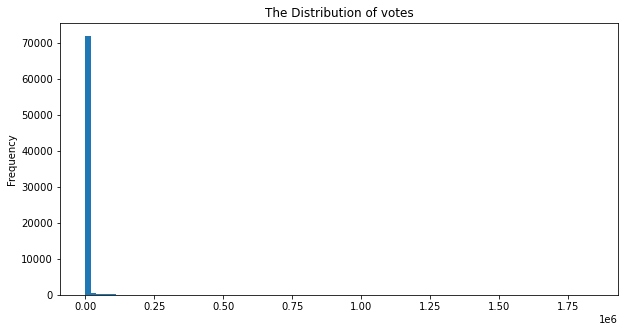

In [32]:
df2['numvotes'].plot.hist(bins = 100, title = 'The Distribution of votes', figsize= (10,5))

Given that the distribution is skewed to the right, replacing the outliers with the mean or standard deviation may affect our values. 
Therefore we will cap the values and consider the ones that are within 97% of all the records.

In [33]:
# Define the threshold to get the quantiles ie. lower limit and the upper limit.
Q1= df2['numvotes'].quantile(0.03)
Q3= df2['numvotes'].quantile(0.97)

In [34]:
df2['numvotes_capped'] = np.where(df2['numvotes'] > Q3, Q3,
                        np.where(df2['numvotes'] < Q1, Q1, 
                        df2['numvotes']))
df2


,tconst,averagerating,numvotes,numvotes_capped
0,tt10356526,8.3,31,31.00
1,tt10384606,8.9,559,559.00
2,tt1042974,6.4,20,20.00
3,tt1043726,4.2,50352,14247.05
4,tt1060240,6.5,21,21.00
...,...,...,...,...
73851,tt9805820,8.1,25,25.00
73852,tt9844256,7.5,24,24.00
73853,tt9851050,4.7,14,14.00
73854,tt9886934,7.0,5,5.00


In [35]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,149.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,149.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,114.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,114.0


In [36]:
df2.head()

,tconst,averagerating,numvotes,numvotes_capped
0,tt10356526,8.3,31,31.00
1,tt10384606,8.9,559,559.00
2,tt1042974,6.4,20,20.00
3,tt1043726,4.2,50352,14247.05
4,tt1060240,6.5,21,21.00


# Analysis and Evaluation

## Prefered Movie genres

Some movie genres are produced more than others. This may be due to the great reception in the market. 
We have the Documentary and Drama genres each taking up 21% of all the movies produced.

In [37]:
#Find out the movie with the highest frequency
genre_freq= df['genres'].value_counts()/ len(df['genres'])
genre_freq

Documentary    0.219804
Drama          0.212325
Comedy         0.107740
Thriller       0.050580
Horror         0.045991
Action         0.043991
Romance        0.039887
Biography      0.037125
Crime          0.028744
Adventure      0.027514
Family         0.026505
History        0.026496
No genre       0.022938
Mystery        0.019831
Music          0.018362
Fantasy        0.014966
Sci-Fi         0.014323
Animation      0.011914
Sport          0.009509
News           0.006602
Musical        0.006087
War            0.005980
Western        0.001988
Reality-TV     0.000417
Talk-Show      0.000213
Adult          0.000106
Short          0.000047
Game-Show      0.000017
Name: genres, dtype: float64

In order to do further analysis on genres and draw meaningful conclusions, we will merge the two datasets, df and df2.
This will give us both details of title basics and title ratings

In [38]:
df3 = pd.merge( df, df2, how="inner", on= 'tconst')
df3

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped,averagerating,numvotes,numvotes_capped
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,149.0,7.0,77,77.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,149.0,7.0,77,77.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,149.0,7.0,77,77.0
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,114.0,7.2,43,43.0
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,114.0,7.2,43,43.0
...,...,...,...,...,...,...,...,...,...,...
129289,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,98.0,8.7,136,136.0
129290,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,98.0,8.7,136,136.0
129291,tt9914642,Albatross,Albatross,2017,NaN,Documentary,88.0,8.5,8,8.0
129292,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,No genre,88.0,6.6,5,5.0


In [39]:
# Summary description of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129294 entries, 0 to 129293
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tconst                  129294 non-null  object 
 1   primary_title           129294 non-null  object 
 2   original_title          129294 non-null  object 
 3   start_year              129294 non-null  int64  
 4   runtime_minutes         118953 non-null  float64
 5   genres                  129294 non-null  object 
 6   runtime_minutes_capped  129294 non-null  float64
 7   averagerating           129294 non-null  float64
 8   numvotes                129294 non-null  int64  
 9   numvotes_capped         129294 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 10.9+ MB


Movies with a single genre on average had a slightly higher rating compared to the ones with multiple genres. Hovever the margin of difference is quite small between the two, in terms of rating.

,genres
tconst,
tt0063540,3
tt0066787,2
tt0069049,1
tt0069204,2
tt0100275,3
...,...
tt9913084,1
tt9914286,2
tt9914642,1


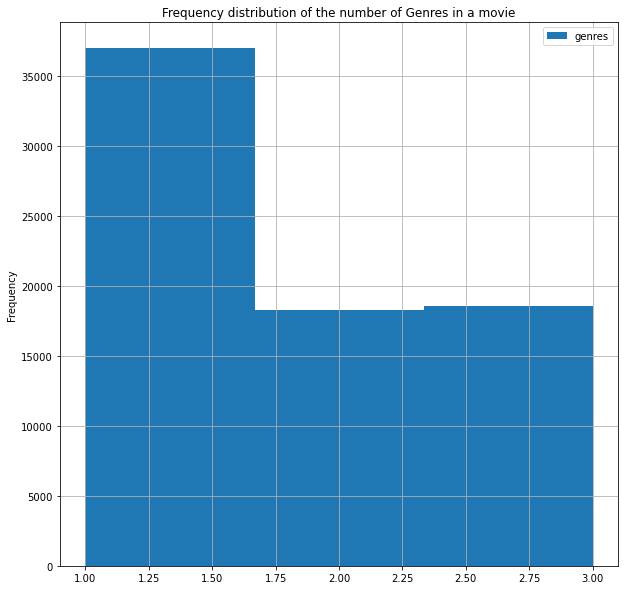

In [40]:
#create a smaller dataframe to sum the number of genres in a movie
dfa= df3[['tconst', 'genres']].groupby(['tconst']).count()

#plot frequency distribution
dfa.plot.hist(bins=3, figsize= (10,10),grid=True, 
              legend=True, title = 'Frequency distribution of the number of Genres in a movie')
dfa

In [41]:
# create a smaller dataframe containing the average rating per movie title
dfb= df3[['tconst', 'averagerating']].groupby(['tconst']).mean()
dfb

,averagerating
tconst,
tt0063540,7.0
tt0066787,7.2
tt0069049,6.9
tt0069204,6.1
tt0100275,6.5
...,...
tt9913084,6.2
tt9914286,8.7
tt9914642,8.5


In [42]:
# merge the two smaller datasets dfa and dfb
dfc= pd.merge( dfa, dfb, how="inner", on= 'tconst')

#Get a small description of the newly formed dataset
print(dfc.info())
dfc

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         73856 non-null  int64  
 1   averagerating  73856 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB
None


,genres,averagerating
tconst,,
tt0063540,3,7.0
tt0066787,2,7.2
tt0069049,1,6.9
tt0069204,2,6.1
tt0100275,3,6.5
...,...,...
tt9913084,1,6.2
tt9914286,2,8.7
tt9914642,1,8.5


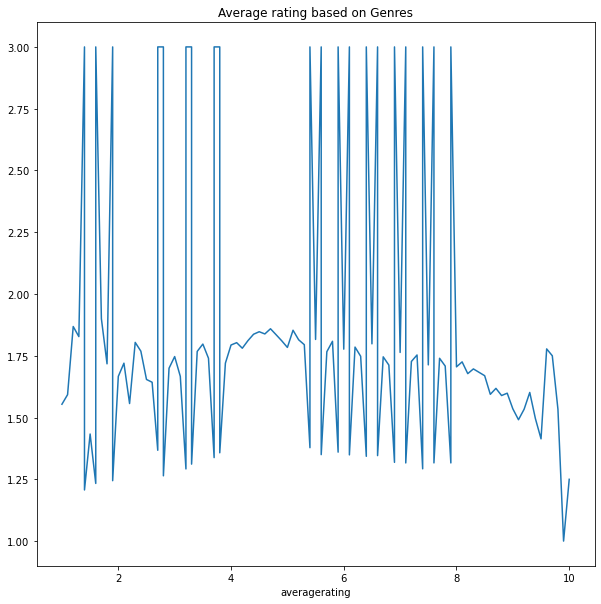

In [43]:
# group data based on number of genres column then plot
dfc.groupby([ 'averagerating',]).mean()['genres'].plot(figsize= (10,10), title= 'Average rating based on Genres')
plt.xticks(rotation=0)
plt.show()

In [44]:
# create a new column to determine whether a movie title has 
# multiple genres or a single genre.
dfc['multiple_or_single'] = dfc['genres'].apply(lambda x: 'single' if x <= 1 else 'multiple')
dfc

,genres,averagerating,multiple_or_single
tconst,,,
tt0063540,3,7.0,multiple
tt0066787,2,7.2,multiple
tt0069049,1,6.9,single
tt0069204,2,6.1,multiple
tt0100275,3,6.5,multiple
...,...,...,...
tt9913084,1,6.2,single
tt9914286,2,8.7,multiple
tt9914642,1,8.5,single


averagerating          
                           count      mean
multiple_or_single                        
multiple                   36860  6.259436
single                     36996  6.405752

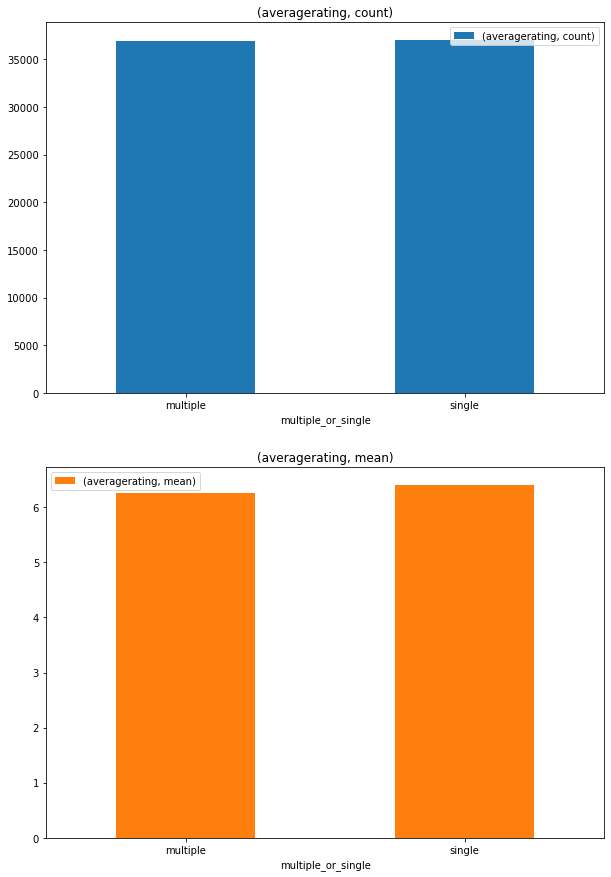

In [45]:
# group the data to see how single genre and multiple genre compare with their average ratings
compare= dfc[['averagerating', 'multiple_or_single']].groupby([ 'multiple_or_single',]).agg(['count', 'mean'])
compare.plot(kind= 'bar', figsize= (10,15),subplots= True, sharex=False, rot= 0)
compare

## Impact of number of votes for a movie on the ratings

Ratings have an impact on the performance of movies created by big companies. High ratings from our analysis increase as the number of votes for them increase. consequently, movies with lower ratings have fewer votes.

In [46]:
#grouping the data we want to assess
df3[['tconst', 'averagerating', 'numvotes_capped']].groupby(['tconst']).mean()

,averagerating,numvotes_capped
tconst,,
tt0063540,7.0,77.0
tt0066787,7.2,43.0
tt0069049,6.9,4517.0
tt0069204,6.1,13.0
tt0100275,6.5,119.0
...,...,...
tt9913084,6.2,6.0
tt9914286,8.7,136.0
tt9914642,8.5,8.0


<AxesSubplot:title={'center':'Correlation between average rating and number of votes'}, xlabel='averagerating', ylabel='numvotes'>

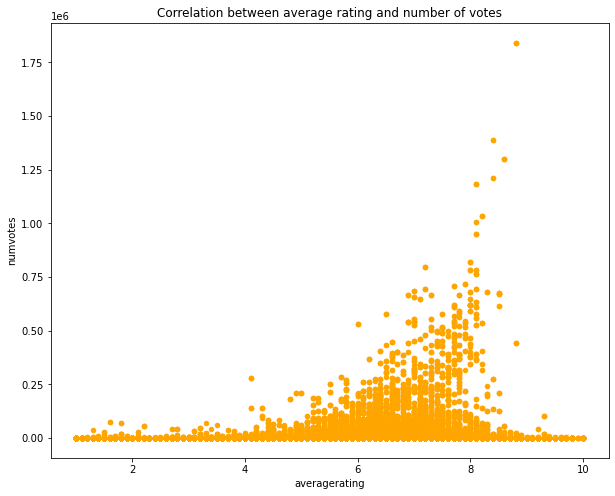

In [47]:
#Scatter plot to show relationship
df3.plot.scatter(x = 'averagerating', y = 'numvotes',
                  color = 'orange',
                 title = 'Correlation between average rating and number of votes', figsize= (10,8))

There's a positive relationship between the two sets of data.

In [48]:
#create a function to show the level of rating in each movie
def level_of_rating(rating):
    if (rating < 4):
        return 'Low'
    elif (rating > 6):
        return 'High'
    else:
        return 'Medium'
df3['level_of_rating'] = df3['averagerating'].apply(level_of_rating)
df3

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,runtime_minutes_capped,averagerating,numvotes,numvotes_capped,level_of_rating
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,149.0,7.0,77,77.0,High
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,149.0,7.0,77,77.0,High
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,149.0,7.0,77,77.0,High
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,114.0,7.2,43,43.0,High
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,114.0,7.2,43,43.0,High
...,...,...,...,...,...,...,...,...,...,...,...
129289,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,98.0,8.7,136,136.0,High
129290,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,98.0,8.7,136,136.0,High
129291,tt9914642,Albatross,Albatross,2017,NaN,Documentary,88.0,8.5,8,8.0,High
129292,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,No genre,88.0,6.6,5,5.0,High


In [49]:
df3[['level_of_rating', 'numvotes_capped']].groupby(['level_of_rating']).agg(['count', 'mean'])

numvotes_capped             
                          count         mean
level_of_rating                             
High                      79143  1312.415804
Low                        9055   466.030447
Medium                    41096  1190.256849

array([<AxesSubplot:title={'center':'(numvotes_capped, count)'}, xlabel='level_of_rating'>,
       <AxesSubplot:title={'center':'(numvotes_capped, mean)'}, xlabel='level_of_rating'>],
      dtype=object)

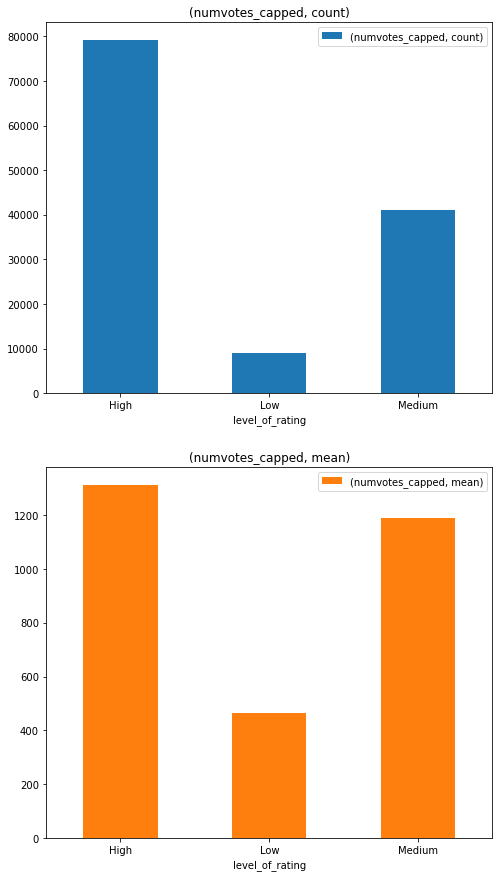

In [50]:
# plot a bar graph showing how the level of rating is affected by the number of votes
df3[['level_of_rating', 'numvotes_capped']].groupby(
    ['level_of_rating']).agg(['count', 'mean']).plot(
    kind = 'bar', rot= 0, figsize= (8,15),
    subplots= True, sharex=False)

## Does the length of a movie affect the rating

Most high rating movies were 90 minutes long and low rating movies had a slightly shorter. Medium rating movies had a higher median than the high rating therefore for a movie to do well, length has to be considered in order to get that optimum sweet spot for consumers.

<AxesSubplot:xlabel='level_of_rating'>

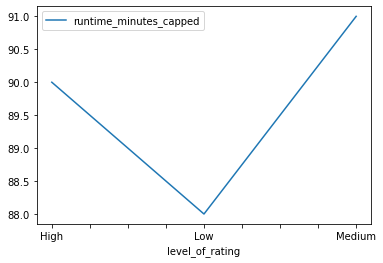

In [51]:
#plot a line graph
df3[['level_of_rating', 'runtime_minutes_capped', ]].groupby(['level_of_rating']).median().plot()

# Conclusion

This analysis leads to a few recommendations for the head of Microsoft's new movie studio.

1. Produce a genre that the market demands most (as indicated by what producers are producing more of). Documentaries ranking highest, may be prefered by consumers due to the fact that they are based on real life. A single genre will also give the company an edge in the market.

2. Invest in consumer feedback. Movies that had high ratings also had many people accessing them and rating them. Microsoft, being a tech company can leverage that and ensure it has algorithms for fetching feedback from consumers.

3. Have an optimal time for the length of the movie. Many movies that rate highly are 90 minutes long. Therefore this seems to be the optimal length for successful viewership by consumers. 

## Next Steps
Further analysis would give more insights to the Microsoft studio by:
1. Modelling the impact of change in title on the ratings. This data is available in the given dataset.